In [1]:
import os
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
os.chdir(os.path.join(os.getcwd(), "..", "data"));

In [3]:
random_state = np.random.seed(24)

In [4]:
df = pd.read_csv("combined-season-data.csv");

In [5]:
df.head()

,season,GW,at_home,player_id,opponent_id,champion_ls,top5_ls,bottom5_ls,promoted_ts,assists_pgw,...,own_goals_pgw,penalties_missed_pgw,penalties_saved_pgw,red_cards_pgw,result_pgw,saves_pgw,threat_pgw,yellow_cards_pgw,total_points_pgw,total_points
0,2016,1,0,1,4,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2016,1,1,2,17,0,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2016,1,1,4,9,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2016,1,0,6,13,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2016,1,1,7,20,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [6]:
df.dtypes

season                    int64
GW                        int64
at_home                   int64
player_id                 int64
opponent_id               int64
champion_ls               int64
top5_ls                   int64
bottom5_ls                int64
promoted_ts               int64
assists_pgw             float64
bonus_pgw               float64
bps_pgw                 float64
clean_sheets_pgw        float64
creativity_pgw          float64
goals_conceded_pgw      float64
goals_scored_pgw        float64
ict_index_pgw           float64
influence_pgw           float64
minutes_pgw             float64
own_goals_pgw           float64
penalties_missed_pgw    float64
penalties_saved_pgw     float64
red_cards_pgw           float64
result_pgw              float64
saves_pgw               float64
threat_pgw              float64
yellow_cards_pgw        float64
total_points_pgw        float64
total_points              int64
dtype: object

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,71132.0,2017.063305,0.902744,2016.0,2016.0,2017.0,2018.0,2019.0
GW,71132.0,19.506144,11.348698,1.0,9.0,20.0,30.0,38.0
at_home,71132.0,0.499958,0.500004,0.0,0.0,0.0,1.0,1.0
player_id,71132.0,487.790418,295.640147,1.0,240.0,478.0,702.0,1211.0
opponent_id,71132.0,12.042934,7.275230,1.0,5.0,11.0,18.0,29.0
champion_ls,71132.0,0.050273,0.218509,0.0,0.0,0.0,0.0,1.0
top5_ls,71132.0,0.250211,0.433137,0.0,0.0,0.0,1.0,1.0
bottom5_ls,71132.0,0.249480,0.432715,0.0,0.0,0.0,0.0,1.0
promoted_ts,71132.0,0.149722,0.356801,0.0,0.0,0.0,0.0,1.0
assists_pgw,71132.0,0.039476,0.211277,0.0,0.0,0.0,0.0,3.0


In [8]:
df.drop(["season", "GW"], axis=1, inplace=True)

In [9]:
X = df.loc[:, df.columns != "total_points"];
y = df.loc[:, df.columns == "total_points"].values.reshape(-1,1);

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=random_state)

In [11]:
regressor = LinearRegression(normalize=True)  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [12]:
coefficients = pd.DataFrame({"Feature":X.columns,"Coefficients":np.transpose(regressor.coef_[0, ])})

In [13]:
coefficients

,Feature,Coefficients
0,at_home,0.268082
1,player_id,-0.000092
2,opponent_id,0.006187
3,champion_ls,0.070681
4,top5_ls,-0.293180
5,bottom5_ls,0.142455
6,promoted_ts,0.156497
7,assists_pgw,0.152361
8,bonus_pgw,-0.157290
9,bps_pgw,-0.011904


In [14]:
y_pred = regressor.predict(X_test)

In [15]:
pred_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

In [16]:
pred_df["in_range"] = pred_df.apply(lambda row: True if (row["Actual"] - row["Predicted"]) <= 1 else False, axis=1)

In [17]:
print("In range: {0:.2f}".format(pred_df[pred_df["in_range"] == True].shape[0]/pred_df.shape[0]))

In range: 0.85


In [18]:
pred_df.head(25)

,Actual,Predicted,in_range
0,1,0.299395,True
1,3,3.018179,True
2,1,0.595791,True
3,0,0.157801,True
4,11,3.472516,False
5,2,0.530764,False
6,2,3.733274,True
7,0,0.326279,True
8,1,0.647323,True
9,0,0.519550,True


In [19]:
test_df = pred_df.head(25)

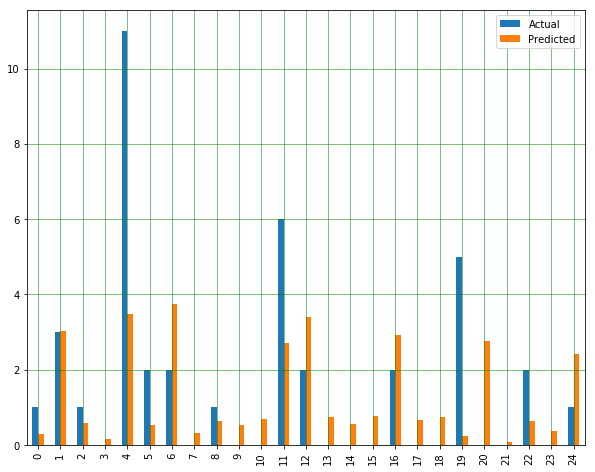

In [20]:
test_df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [21]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('R2 score:', metrics.r2_score(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.3380360542608445
R2 score: 0.24037430764387557
Mean Squared Error: 4.990185446247969
Root Mean Squared Error: 2.2338722985542323


In [22]:
player_id_df = pd.read_csv("player_id_map.csv");
team_id_df = pd.read_csv("team_id_map.csv");

In [23]:
# load and the test weekly fpl scrape
gw=7
weekly_scrape = pd.read_csv("gw{}-fpl-data.csv".format(gw));

In [24]:
weekly_scrape = weekly_scrape[X_test.columns]

In [25]:
y_pred_weekly = regressor.predict(weekly_scrape);

In [26]:
y_pred_weekly_df = pd.DataFrame({'player_id': list(weekly_scrape["player_id"]), 'predicted': y_pred_weekly.flatten()})

In [27]:
player_names = [];
opponent_names = [];

for index, row in weekly_scrape.iterrows():
    player_id = row["player_id"];
    opponent_id = row["opponent_id"];
    
    player_names.append(player_id_df[player_id_df["player_id"] == player_id]["actual_name"].iloc[0]);
    opponent_names.append(team_id_df[team_id_df["team_id"] == opponent_id]["team_name"].iloc[0]);

In [28]:
y_pred_weekly_df["player_name"] = player_names;
y_pred_weekly_df["opponent"] = opponent_names;

In [29]:
y_pred_weekly_df = y_pred_weekly_df[["player_id", "player_name", "opponent", "predicted"]];

In [30]:
y_pred_weekly_df.sort_values(["predicted"], ascending=False)

,player_id,player_name,opponent,predicted
10,385,Kevin De Bruyne,Everton,4.666094
3,514,Nicolás Otamendi,Everton,3.757736
14,858,Pierre-Emerick Aubameyang,Manchester United,3.519312
2,648,Trent Alexander-Arnold,Sheffield United,3.437139
9,1176,Mason Mount,Brighton and Hove Albion,3.383878
13,1204,Teemu Pukki,Crystal Palace,3.228012
12,882,Tammy Abraham,Brighton and Hove Albion,3.218403
0,176,David de Gea,Arsenal,2.953230
11,1206,Todd Cantwell,Crystal Palace,2.871828
4,977,Issa Diop,Bournemouth,2.805161
